In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c dogs-vs-cats

 99% 802M/812M [00:09<00:00, 107MB/s]
100% 812M/812M [00:09<00:00, 89.2MB/s]


In [ ]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [ ]:
from zipfile import ZipFile
dataset = '/content/dogs-vs-cats.zip'
# بنقراء الداتا سيت من الملف المضغوط و بنعملها اكستراكت
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
from zipfile import ZipFile
dataset = '/content/train.zip'
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
# path: المسار إلى المجلد الحالي
# dirs: قائمة بالمجلدات الفرعية الموجودة داخل train (إن وُجدت)
# files: قائمة بأسماء الملفات الموجودة في المجلد train
# os.walk: تُستخدم لاستعراض المجلدات والملفات في مسار معين
# next(): تُستخدم هنا للحصول على أول نتيجة فقط من os.walk (المجلد الجذري دون التعمق في المجلدات الفرعية).
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


In [ ]:
file_names = os.listdir('/content/train/')
# os.listdir(): تُستخدم للحصول على قائمة بجميع الملفات والمجلدات داخل المجلد
print(file_names)

['dog.3850.jpg', 'dog.8971.jpg', 'cat.966.jpg', 'dog.8597.jpg', 'cat.1525.jpg', 'dog.10424.jpg', 'dog.223.jpg', 'dog.4918.jpg', 'cat.6564.jpg', 'cat.4140.jpg', 'cat.4304.jpg', 'cat.6504.jpg', 'dog.1624.jpg', 'cat.2766.jpg', 'cat.612.jpg', 'dog.11435.jpg', 'cat.7518.jpg', 'dog.6607.jpg', 'dog.2405.jpg', 'cat.12037.jpg', 'dog.1945.jpg', 'cat.9922.jpg', 'dog.7021.jpg', 'dog.5353.jpg', 'dog.11406.jpg', 'dog.801.jpg', 'dog.6968.jpg', 'cat.749.jpg', 'cat.3377.jpg', 'cat.5032.jpg', 'cat.2372.jpg', 'dog.861.jpg', 'dog.8979.jpg', 'cat.4997.jpg', 'cat.11164.jpg', 'cat.10480.jpg', 'cat.7286.jpg', 'cat.841.jpg', 'dog.5623.jpg', 'cat.6721.jpg', 'dog.11706.jpg', 'cat.11673.jpg', 'dog.6590.jpg', 'cat.5702.jpg', 'cat.426.jpg', 'cat.1055.jpg', 'dog.10917.jpg', 'dog.11464.jpg', 'dog.5100.jpg', 'dog.2431.jpg', 'dog.3978.jpg', 'dog.10650.jpg', 'cat.6972.jpg', 'dog.9212.jpg', 'cat.2654.jpg', 'cat.5597.jpg', 'dog.8066.jpg', 'cat.12433.jpg', 'dog.5950.jpg', 'dog.9525.jpg', 'dog.8252.jpg', 'cat.1496.jpg', 'ca

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

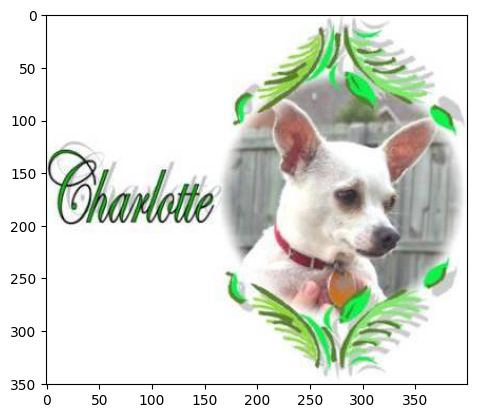

In [ ]:
img = mpimg.imread('/content/train/dog.3154.jpg')
imgplt = plt.imshow(img)
# plt.show()

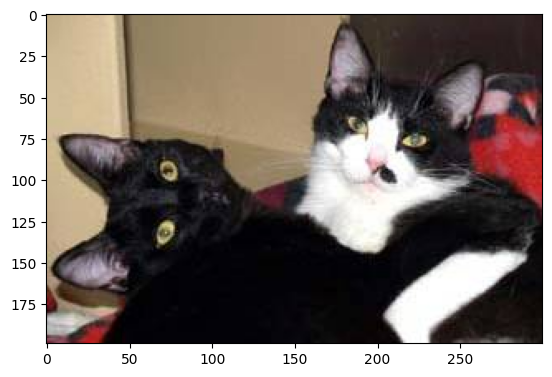

In [ ]:
img = mpimg.imread('/content/train/cat.11375.jpg')
imgplt = plt.imshow(img)
# plt.show()

In [ ]:
# file_names = os.listdir('/content/train/')
# قراءة أسماء الملفات الموجودة في المجلد المحدد ويخزنها في قائمة
for i in range(8):
  name = file_names[i]
  print(name[0:3])

dog
dog
cat
dog
cat
dog
dog
dog


In [ ]:
# file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


In [ ]:
# os.mkdir('/content/image_resized')
# بنعمل فولدر نحط في الصور بعد الري سايز

In [ ]:
original_folder = '/content/train/'
resized_folder = '/content/image_resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

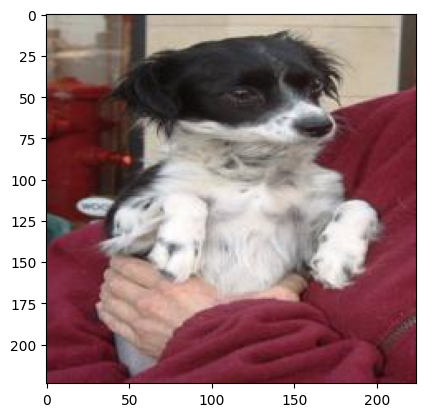

In [ ]:
img = mpimg.imread('/content/image_resized/dog.10132.jpg')
imgplt = plt.imshow(img)
# plt.show()

In [ ]:
filenames = os.listdir('/content/image_resized/')
#بندي لابل للكلب بقيمه 1
#بندي لابل للقطه بقيمه 0

labels = []
for i in range(2000):
  file_name = filenames[i]
  label = file_name[0:3]
  if label == 'dog':
    labels.append(1)
  else:
    labels.append(0)

In [ ]:
print(filenames[0:5])
print(len(filenames))

['dog.3850.jpg', 'dog.8971.jpg', 'cat.966.jpg', 'dog.8597.jpg', 'cat.1525.jpg']
2000


In [ ]:
print(labels[0:5])
print(len(labels))

[1, 1, 0, 1, 0]
2000


In [ ]:
values, counts = np.unique(labels, return_counts=True)
# return_counts=True: هذه الميزة تجعل الدالة ترجع أيضًا عدد مرات تكرار كل قيمة فريدة. بمعنى آخر، ستعيد عدد الكلاب (1) وعدد القطط (0)
#بنحسب عدد القطط و الكلاب
print(values)
print(counts)

[0 1]
[ 979 1021]


In [ ]:
import cv2
import glob

In [ ]:
image_directory = '/content/image_resized/'
image_extension = ['png', 'jpg']

files = []
[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]
dog_cat_images = np.asarray([cv2.imread(file) for file in files])
# تستخدم دالة glob.glob للبحث عن جميع الملفات التي تنتهي بالامتداد المحدد في المتغير e
#بنحول الصور لاراي

In [ ]:
print(dog_cat_images)

[[[[218 218 218]
   [243 243 243]
   [255 255 255]
   ...
   [174 131 116]
   [172 129 114]
   [172 129 114]]

  [[234 234 234]
   [241 241 241]
   [246 246 246]
   ...
   [177 134 119]
   [176 133 118]
   [176 133 118]]

  [[237 237 237]
   [236 236 236]
   [241 241 241]
   ...
   [178 135 120]
   [179 136 121]
   [179 136 121]]

  ...

  [[204 188 181]
   [212 196 189]
   [204 191 183]
   ...
   [154 157 161]
   [159 163 164]
   [162 166 167]]

  [[164 146 139]
   [182 166 159]
   [173 160 152]
   ...
   [137 144 147]
   [138 146 146]
   [139 147 147]]

  [[105  87  80]
   [132 116 109]
   [127 111 104]
   ...
   [138 147 150]
   [139 149 149]
   [139 149 149]]]


 [[[183 221 233]
   [132 170 182]
   [107 144 158]
   ...
   [122 169 200]
   [125 172 203]
   [117 164 195]]

  [[186 224 236]
   [141 179 191]
   [108 145 159]
   ...
   [113 160 191]
   [116 163 194]
   [109 156 187]]

  [[165 203 215]
   [127 165 177]
   [103 140 154]
   ...
   [111 157 188]
   [113 159 190]
   [106 152

In [ ]:
type(dog_cat_images)

numpy.ndarray

In [ ]:
print(dog_cat_images.shape)
#ال 3 ترمز الي ال RGB

(2000, 224, 224, 3)


In [ ]:
X = dog_cat_images
Y = np.asarray(labels)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [ ]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255
#بخلي قيم الانتينستي تتراوح بين 0 و 1

In [ ]:
print(X_train_scaled)

[[[[0.         0.         0.05490196]
   [0.         0.         0.05882353]
   [0.         0.         0.0627451 ]
   ...
   [0.24705882 0.29411765 0.55294118]
   [0.23921569 0.29019608 0.55686275]
   [0.22745098 0.27843137 0.54509804]]

  [[0.04705882 0.04705882 0.11764706]
   [0.03921569 0.03921569 0.10980392]
   [0.03137255 0.03137255 0.10196078]
   ...
   [0.25098039 0.29803922 0.55686275]
   [0.24313725 0.29411765 0.56078431]
   [0.23137255 0.28235294 0.54901961]]

  [[0.11764706 0.12156863 0.20392157]
   [0.09803922 0.10196078 0.18431373]
   [0.07058824 0.0745098  0.15294118]
   ...
   [0.25882353 0.30588235 0.56470588]
   [0.25098039 0.30196078 0.56862745]
   [0.23529412 0.28627451 0.55294118]]

  ...

  [[0.24313725 0.20784314 0.24705882]
   [0.16862745 0.1372549  0.17647059]
   [0.39607843 0.36470588 0.40784314]
   ...
   [0.5372549  0.58039216 0.69019608]
   [0.55294118 0.59607843 0.70588235]
   [0.56078431 0.60392157 0.71372549]]

  [[0.29803922 0.2627451  0.30196078]
   [0.1

In [ ]:
import tensorflow as tf

pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,  # لا نحتاج إلى الطبقة العليا
    weights='imagenet'  #يتيح للنموذج الاستفادة من المعرفة التي تم تعلمها مسبقًا
)

num_of_classes = 2
model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.GlobalAveragePooling2D(), #هذه العملية تعمل على تقليل الأبعاد المكانية (مثل الطول والعرض) وتحويل البيانات إلى تمثيل أكثر تبسيطًا.
    tf.keras.layers.Dense(num_of_classes, activation='softmax') #تقوم بتحويل القيم إلى احتمالات بحيث تكون مجموع الاحتمالات = 1
])

model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │           2,562 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,260,546 (8.62 MB)

 Trainable params: 2,226,434 (8.49 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [ ]:
model.compile(
    optimizer = 'adam', #هي الخوارزمية التي سيتم استخدامها لتحديث الأوزان أثناء تدريب النموذج
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), #القيم غير طبيعية وغير محولة إلى احتمالات بين 0 و 1.
    metrics = ['acc'] #حدد الدقة النسبة المئوية للعينات التي تم تصنيفها بشكل صحيح.
)

In [ ]:
model.fit(X_train_scaled, Y_train, epochs=4)

Epoch 1/4


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


50/50 ━━━━━━━━━━━━━━━━━━━━ 375s 7s/step - acc: 0.8473 - loss: 0.3524
Epoch 2/4
50/50 ━━━━━━━━━━━━━━━━━━━━ 367s 6s/step - acc: 0.9666 - loss: 0.0924
Epoch 3/4
50/50 ━━━━━━━━━━━━━━━━━━━━ 372s 6s/step - acc: 0.9642 - loss: 0.1338
Epoch 4/4
50/50 ━━━━━━━━━━━━━━━━━━━━ 329s 6s/step - acc: 0.9810 - loss: 0.0584


In [ ]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - acc: 0.7810 - loss: 1.6542
Test Loss = 1.7661155462265015
Test Accuracy = 0.7900000214576721


In [ ]:
# input_image_path = input('Path of the image to be predicted: ')

# input_image = cv2.imread(input_image_path)

# cv2_imshow(input_image)

# input_image_resize = cv2.resize(input_image, (224,224))

# input_image_scaled = input_image_resize/255

# image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])
# # بعرف الموديل اني ببريديكت لصوره وحده بس

# input_prediction = model.predict(image_reshaped)
# # نسبه انها كلب و نسبه انها قط

# print(input_prediction)

# input_pred_label = np.argmax(input_prediction)

# print(input_pred_label)

# if input_pred_label == 0:
#   print('The image represents a Cat')

# else:
#   print('The image represents a Dog')

Enter the URL of the image to be predicted: https://imgs.search.brave.com/Tcrv8lKuwVznw_RLmvRhA78REhdxDsSEbIv2pTuMzuk/rs:fit:500:0:0:0/g:ce/aHR0cHM6Ly9pbWcu/ZnJlZXBpay5jb20v/cHJlbWl1bS1waG90/by9weXJlbmVhbi1z/aGVwaGVyZC0xMi15/ZWFycy1vbGQtZG9n/LXBvcnRyYWl0LWlz/b2xhdGVkXzE5MTk3/MS0xNjQzLmpwZz9z/ZW10PWFpc19oeWJy/aWQ
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[6.109498e-07 9.999994e-01]]
The image represents a Dog


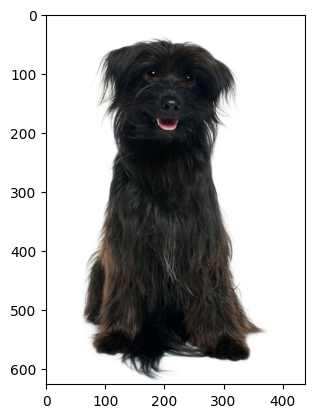

In [ ]:
import requests
image_url = input('Enter the URL of the image to be predicted: ')
response = requests.get(image_url, stream=True)
if response.status_code == 200:
    image = Image.open(response.raw)
    plt.imshow(image)
    image.show()
    image_np = np.array(image)
    if len(image_np.shape) == 2:
        image_np = cv2.cvtColor(image_np, cv2.COLOR_GRAY2RGB)
    elif image_np.shape[2] == 4:
        image_np = cv2.cvtColor(image_np, cv2.COLOR_RGBA2RGB)

    input_image_resize = cv2.resize(image_np, (224, 224))
    input_image_scaled = input_image_resize / 255.0
    image_reshaped = np.reshape(input_image_scaled, [1, 224, 224, 3])
    input_prediction = model.predict(image_reshaped)
    print(input_prediction)
    input_pred_label = np.argmax(input_prediction)
    if input_pred_label == 0:
        print('The image represents a Cat')
    else:
        print('The image represents a Dog')

In [ ]:
from tensorflow import keras
from tensorflow import lite
converter=tf.lite.TFLiteConverter.from_keras_model(model)
tfmodel=converter.convert()
open("animal.tflite","wb").write(tfmodel)

Saved artifact at '/tmp/tmpdlsb9k9z'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_154')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  133037720692944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133037718984608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133037718985312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133037718980032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133037718982320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133037720697344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133037718990064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133037718992528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133037718988656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133037718991296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1330377189

8874936